In [1]:
import lambeq as lq
import pandas as pd
import gensim.downloader as api
import nltk
import numpy as np
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
word_vectors = api.load("glove-wiki-gigaword-50")
parser = lq.BobcatParser()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
#function to parse the sentence
def sentence_to_diagram(sentence):
    return parser.sentence2diagram(sentence)

In [3]:
#loading clean data
df = pd.read_csv("Emotion_classify_Data.csv")
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


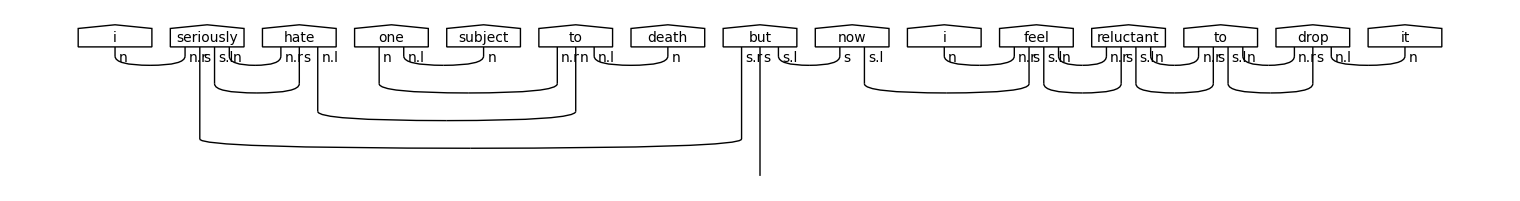

In [4]:
#testing function
diag = sentence_to_diagram(df.loc[0]["Comment"])
diag.draw(figsize=(15,10))

In [5]:
#tokenizing sentences
df['tokens'] = df['Comment'].apply(word_tokenize)

df.head()

,Comment,Emotion,tokens
0,i seriously hate one subject to death but now ...,fear,"[i, seriously, hate, one, subject, to, death, ..."
1,im so full of life i feel appalled,anger,"[im, so, full, of, life, i, feel, appalled]"
2,i sit here to write i start to dig out my feel...,fear,"[i, sit, here, to, write, i, start, to, dig, o..."
3,ive been really angry with r and i feel like a...,joy,"[ive, been, really, angry, with, r, and, i, fe..."
4,i feel suspicious if there is no one outside l...,fear,"[i, feel, suspicious, if, there, is, no, one, ..."


In [6]:
#determining type of words
df['pos_tags'] = df['tokens'].apply(nltk.pos_tag)
df.loc[3]


Comment     ive been really angry with r and i feel like a...
Emotion                                                   joy
tokens      [ive, been, really, angry, with, r, and, i, fe...
pos_tags    [(ive, JJ), (been, VBN), (really, RB), (angry,...
Name: 3, dtype: object

In [7]:
#dictionary to find all unique types used
pos = {}
for indx, row in df.iterrows():
    for elem in row['pos_tags']:
        if pos.get(elem[1])==None:
            pos[elem[1]] = 1
    

In [8]:
pos

{'NN': 1,
 'RB': 1,
 'VB': 1,
 'CD': 1,
 'TO': 1,
 'CC': 1,
 'VBP': 1,
 'JJ': 1,
 'PRP': 1,
 'NNS': 1,
 'IN': 1,
 'VBN': 1,
 'RP': 1,
 'PRP$': 1,
 'DT': 1,
 'MD': 1,
 'VBG': 1,
 'EX': 1,
 'VBZ': 1,
 'VBD': 1,
 'WRB': 1,
 'WDT': 1,
 'WP': 1,
 'PDT': 1,
 'JJR': 1,
 'RBR': 1,
 'RBS': 1,
 'JJS': 1,
 'FW': 1,
 'NNP': 1,
 'POS': 1,
 'UH': 1,
 'WP$': 1}

In [9]:
# mapping from POS tags to atomic types
from lambeq import AtomicType

noun = AtomicType.NOUN
noun_phrase = AtomicType.NOUN_PHRASE
sentence = AtomicType.SENTENCE
conjunction = AtomicType.CONJUNCTION
prepositional_phrase = AtomicType.PREPOSITIONAL_PHRASE



pos_to_atomic_type = {
    # Nouns
    'NN': noun,   # Noun, singular or mass
    'NNS': noun,  # Noun, plural
    'NNP': noun,  # Proper noun, singular
   # 'NNPS': noun, # Proper noun, plural
    
    # Pronouns (considered part of noun phrase)
    'PRP': noun_phrase,  # Personal pronoun
    'PRP$': noun_phrase, # Possessive pronoun
    'WP': noun_phrase,   # Wh-pronoun
    'WP$': noun_phrase,  # Possessive wh-pronoun
    
    # Determiners and adjectives (noun phrases)
    'DT': noun_phrase,   # Determiner
    'JJ': noun_phrase,   # Adjective
    'JJR': noun_phrase,  # Adjective, comparative
    'JJS': noun_phrase,  # Adjective, superlative
    'PDT': noun_phrase,  # Predeterminer
    
    # Verbs and sentence structure
    'VB': sentence,    # Verb, base form
    'VBD': sentence,   # Verb, past tense
    'VBG': sentence,   # Verb, gerund or present participle
    'VBN': sentence,   # Verb, past participle
    'VBP': sentence,   # Verb, non-3rd person singular present
    'VBZ': sentence,   # Verb, 3rd person singular present
    'MD': sentence,    # Modal
    
    # Adverbs
    'RB': sentence,    # Adverb
    'RBR': sentence,   # Adverb, comparative
    'RBS': sentence,   # Adverb, superlative
    'WRB': sentence,   # Wh-adverb

    # Conjunctions
    'CC': conjunction, # Coordinating conjunction

    # Prepositions
    'IN': prepositional_phrase, # Preposition or subordinating conjunction
    'TO': prepositional_phrase, # 'to'

    # Particles
    'RP': sentence, # Particle

    # Existential
    'EX': sentence, # Existential there

    # Foreign Word
    'FW': noun,     # Foreign word (usually context dependent)

    # Possessive ending
    'POS': noun_phrase, # Possessive ending

    # Interjection
    'UH': sentence, # Interjection (exclamation, etc.)

    'CD':noun_phrase,
    'WDT': prepositional_phrase
}
len(pos_to_atomic_type)

33

In [10]:
def map_pos_to_atomic(pos_tags):
    return [pos_to_atomic_type.get(pos[1], None)  for pos in pos_tags]

df['atomic_types'] = df['pos_tags'].apply(map_pos_to_atomic)

In [11]:
df.head()

,Comment,Emotion,tokens,pos_tags,atomic_types
0,i seriously hate one subject to death but now ...,fear,"[i, seriously, hate, one, subject, to, death, ...","[(i, NN), (seriously, RB), (hate, VB), (one, C...","[((n)), ((s)), ((s)), ((n)), ((n)), ((p)), ((n..."
1,im so full of life i feel appalled,anger,"[im, so, full, of, life, i, feel, appalled]","[(im, NNS), (so, RB), (full, JJ), (of, IN), (l...","[((n)), ((s)), ((n)), ((p)), ((n)), ((n)), ((s..."
2,i sit here to write i start to dig out my feel...,fear,"[i, sit, here, to, write, i, start, to, dig, o...","[(i, JJ), (sit, NN), (here, RB), (to, TO), (wr...","[((n)), ((n)), ((s)), ((p)), ((s)), ((n)), ((s..."
3,ive been really angry with r and i feel like a...,joy,"[ive, been, really, angry, with, r, and, i, fe...","[(ive, JJ), (been, VBN), (really, RB), (angry,...","[((n)), ((s)), ((s)), ((n)), ((p)), ((n)), ((c..."
4,i feel suspicious if there is no one outside l...,fear,"[i, feel, suspicious, if, there, is, no, one, ...","[(i, NN), (feel, VBP), (suspicious, JJ), (if, ...","[((n)), ((s)), ((n)), ((p)), ((s)), ((s)), ((n..."


In [12]:
np.random.seed(42)
def get_vector(word, vector_size=50):
    try:
        return word_vectors[word.lower()]
    except KeyError:
        # Return a random vector if the word is not in the vocabulary
        return np.random.uniform(-1, 1, vector_size).tolist()

In [13]:
df['word_vectors'] = df['tokens'].apply(lambda tokens: [get_vector(token) for token in tokens])

In [14]:
labels = ["fear","anger", "joy"]
label_vectors = [get_vector(i) for i in labels]
print(f"Vector for '{labels}': {label_vectors}")

Vector for '['fear', 'anger', 'joy']': [array([ 0.53661 , -0.33872 ,  0.28772 , -0.72584 , -0.041209,  0.28498 ,
        0.21665 ,  0.62408 , -0.1204  ,  0.41135 ,  0.10111 , -0.11545 ,
       -0.15652 , -0.39265 ,  0.66286 ,  0.71563 ,  0.4214  , -0.37041 ,
       -0.081016, -0.2901  , -0.28407 ,  0.30707 ,  0.035974,  0.32002 ,
        0.45456 , -2.083   , -0.6589  , -0.081918,  1.0431  ,  0.50839 ,
        2.5433  ,  0.81832 , -0.11508 , -1.1471  , -1.0422  , -0.22972 ,
       -0.68159 , -1.3633  ,  0.063994, -0.27115 , -0.41006 ,  0.090468,
        0.19801 ,  0.486   ,  0.84081 ,  0.38655 , -0.40763 ,  0.20565 ,
       -0.1169  , -0.55731 ], dtype=float32), array([-0.044806 ,  0.24917  ,  0.088818 , -0.7982   ,  0.15031  ,
        0.6785   ,  0.83496  ,  0.86424  , -0.71302  ,  0.75296  ,
       -0.31585  , -0.2964   , -0.12553  , -0.73859  ,  0.1535   ,
        0.18059  , -0.080169 ,  0.0029328, -0.14163  , -0.56985  ,
        0.38888  ,  0.6309   ,  0.038375 , -0.32777  ,  0.7216

In [15]:
print(df[['tokens', 'word_vectors']])

                                                 tokens  \
0     [i, seriously, hate, one, subject, to, death, ...   
1           [im, so, full, of, life, i, feel, appalled]   
2     [i, sit, here, to, write, i, start, to, dig, o...   
3     [ive, been, really, angry, with, r, and, i, fe...   
4     [i, feel, suspicious, if, there, is, no, one, ...   
...                                                 ...   
5932         [i, begun, to, feel, distressed, for, you]   
5933  [i, left, feeling, annoyed, and, angry, thinki...   
5934  [i, were, to, ever, get, married, i, d, have, ...   
5935  [i, feel, reluctant, in, applying, there, beca...   
5936  [i, just, wanted, to, apologize, to, you, beca...   

                                           word_vectors  
0     [[0.11891, 0.15255, -0.082073, -0.74144, 0.759...  
1     [[-0.067678, 0.51832, 1.326, -0.38666, -0.7974...  
2     [[0.11891, 0.15255, -0.082073, -0.74144, 0.759...  
3     [[0.22862, -0.79541, -0.4977, -1.0859, 0.03766...  
4

In [16]:
def atomic_dict(atomic_types):
    dic = {}
    for i in atomic_types:
        if(dic.get(i)!=None):
            dic[i] +=1
        else:
            dic[i]=1
    return dic

In [17]:
df['atomic_dict'] = df['atomic_types'].apply(atomic_dict)
df.head()

,Comment,Emotion,tokens,pos_tags,atomic_types,word_vectors,atomic_dict
0,i seriously hate one subject to death but now ...,fear,"[i, seriously, hate, one, subject, to, death, ...","[(i, NN), (seriously, RB), (hate, VB), (one, C...","[((n)), ((s)), ((s)), ((n)), ((n)), ((p)), ((n...","[[0.11891, 0.15255, -0.082073, -0.74144, 0.759...","{((n)): 6, ((s)): 6, ((p)): 2, ((conj)): 1}"
1,im so full of life i feel appalled,anger,"[im, so, full, of, life, i, feel, appalled]","[(im, NNS), (so, RB), (full, JJ), (of, IN), (l...","[((n)), ((s)), ((n)), ((p)), ((n)), ((n)), ((s...","[[-0.067678, 0.51832, 1.326, -0.38666, -0.7974...","{((n)): 4, ((s)): 3, ((p)): 1}"
2,i sit here to write i start to dig out my feel...,fear,"[i, sit, here, to, write, i, start, to, dig, o...","[(i, JJ), (sit, NN), (here, RB), (to, TO), (wr...","[((n)), ((n)), ((s)), ((p)), ((s)), ((n)), ((s...","[[0.11891, 0.15255, -0.082073, -0.74144, 0.759...","{((n)): 11, ((s)): 12, ((p)): 5, ((conj)): 1}"
3,ive been really angry with r and i feel like a...,joy,"[ive, been, really, angry, with, r, and, i, fe...","[(ive, JJ), (been, VBN), (really, RB), (angry,...","[((n)), ((s)), ((s)), ((n)), ((p)), ((n)), ((c...","[[0.22862, -0.79541, -0.4977, -1.0859, 0.03766...","{((n)): 10, ((s)): 4, ((p)): 4, ((conj)): 1}"
4,i feel suspicious if there is no one outside l...,fear,"[i, feel, suspicious, if, there, is, no, one, ...","[(i, NN), (feel, VBP), (suspicious, JJ), (if, ...","[((n)), ((s)), ((n)), ((p)), ((s)), ((s)), ((n...","[[0.11891, 0.15255, -0.082073, -0.74144, 0.759...","{((n)): 7, ((s)): 5, ((p)): 3, ((conj)): 1}"


conversion to ansatz (unable)

In [18]:
from lambeq.ansatz import IQPAnsatz

def encode_sentence(atomic_dict, token, atomic_types):
    ansatz = IQPAnsatz(atomic_dict,n_layers=5)
    diagram  = ansatz((token, atomic_types))
    diagram.draw(figsize=(15,10))



In [19]:
encode_sentence(df.loc[0]['atomic_dict'],df.loc[0]['tokens'], df.loc[0]['atomic_types'])

TypeError: unhashable type: 'list'